In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hecto\Anaconda23\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

## Carga de datos

In [4]:
datos_modelo = pd.read_csv('datos_modelo_beat.csv')

In [5]:
datos_modelo.head()

,Type of crime,Beat,Year,Month,Day,Wday,Hour,Min
0,DECEPTIVE PRACTICE,934,2014,1,1,4,0,0
1,CRIM SEXUAL ASSAULT,931,2014,1,1,4,0,0
2,CRIMINAL DAMAGE,1631,2014,1,1,4,0,0
3,THEFT,1932,2014,1,1,4,0,0
4,CRIMINAL DAMAGE,1932,2014,1,1,4,0,0


In [6]:
datos_modelo.tail()

,Type of crime,Beat,Year,Month,Day,Wday,Hour,Min
1061947,CRIMINAL DAMAGE,1235,2017,12,31,1,23,45
1061948,BATTERY,522,2017,12,31,1,23,45
1061949,THEFT,1833,2017,12,31,1,23,48
1061950,BATTERY,1935,2017,12,31,1,23,50
1061951,BURGLARY,1723,2017,12,31,1,23,58


In [7]:
# Variables dummy a partir de la variable categórica "Type of crime"
dummy_typ_crime = pd.get_dummies(datos_modelo["Type of crime"], prefix = "Type")
dummy_beat = pd.get_dummies(datos_modelo["Beat"], prefix = "Beat")
dummy_typ_crime.head()

,Type_ARSON,Type_ASSAULT,Type_BATTERY,Type_BURGLARY,Type_CONCEALED CARRY LICENSE VIOLATION,Type_CRIM SEXUAL ASSAULT,Type_CRIMINAL DAMAGE,Type_CRIMINAL TRESPASS,Type_DECEPTIVE PRACTICE,Type_GAMBLING,...,Type_OTHER NARCOTIC VIOLATION,Type_OTHER OFFENSE,Type_PROSTITUTION,Type_PUBLIC INDECENCY,Type_PUBLIC PEACE VIOLATION,Type_ROBBERY,Type_SEX OFFENSE,Type_STALKING,Type_THEFT,Type_WEAPONS VIOLATION
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dummy_beat.head()

,Beat_111,Beat_112,Beat_113,Beat_114,Beat_121,Beat_122,Beat_123,Beat_124,Beat_131,Beat_132,...,Beat_2521,Beat_2522,Beat_2523,Beat_2524,Beat_2525,Beat_2531,Beat_2532,Beat_2533,Beat_2534,Beat_2535
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Eliminar del dataframe principal las variables originales referidas a la tipología
# del delito y beat y anadir las variables dummy

column_name = datos_modelo.columns.values.tolist()

datos_modelo = datos_modelo.drop(["Type of crime", "Beat"], axis = 1)

datos_modelo = pd.concat([datos_modelo, dummy_typ_crime, dummy_beat], axis = 1)
datos_modelo.head()

,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,Type_BATTERY,Type_BURGLARY,...,Beat_2521,Beat_2522,Beat_2523,Beat_2524,Beat_2525,Beat_2531,Beat_2532,Beat_2533,Beat_2534,Beat_2535
0,2014,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Conjuntos de entrenamiento y validación

In [10]:
len(datos_modelo)

1061952

In [11]:
train = datos_modelo[datos_modelo["Year"] != 2017]
test = datos_modelo[datos_modelo["Year"] == 2017]

In [13]:
print("train: {} ({} %), {} ({} %)".format(len(train), (len(train)/len(datos_modelo))*100, len(test), (len(test)/len(datos_modelo))*100))

train: 797762 (75.12222774664015 %), 264190 (24.87777225335985 %)


In [14]:
train.tail()

,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,Type_BATTERY,Type_BURGLARY,...,Beat_2521,Beat_2522,Beat_2523,Beat_2524,Beat_2525,Beat_2531,Beat_2532,Beat_2533,Beat_2534,Beat_2535
797757,2016,12,31,7,23,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797758,2016,12,31,7,23,55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
797759,2016,12,31,7,23,55,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797760,2016,12,31,7,23,58,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
797761,2016,12,31,7,23,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test.head()

,Year,Month,Day,Wday,Hour,Min,Type_ARSON,Type_ASSAULT,Type_BATTERY,Type_BURGLARY,...,Beat_2521,Beat_2522,Beat_2523,Beat_2524,Beat_2525,Beat_2531,Beat_2532,Beat_2533,Beat_2534,Beat_2535
797762,2017,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797763,2017,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797764,2017,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797765,2017,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797766,2017,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
all_columns = datos_modelo.columns.values.tolist()
attr_columns = all_columns[:39]
labels_columns = [x for x in all_columns if x not in attr_columns]

train_attr = train[attr_columns]
train_labels = train[labels_columns]

test_attr = test[attr_columns]
test_labels = test[labels_columns]

In [26]:
print("Dimensiones")
print("train_attr: ", train_attr.shape, "train_labels: ", train_labels.shape, "test_attr: ", test_attr.shape, "test_labels: ", test_labels.shape)

Dimensiones
train_attr:  (797762, 39) train_labels:  (797762, 274) test_attr:  (264190, 39) test_labels:  (264190, 274)


In [29]:
def change_type(df):
    for attr in df:
        df[attr] = df[attr].astype(float)
    print("Conversión realizada")

In [30]:
change_type(train_attr)
change_type(train_labels)
change_type(test_attr)
change_type(test_labels)

C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Conversión realizada
Conversión realizada
Conversión realizada
Conversión realizada


In [31]:
test_attr.dtypes

Year                                      float64
Month                                     float64
Day                                       float64
Wday                                      float64
Hour                                      float64
Min                                       float64
Type_ARSON                                float64
Type_ASSAULT                              float64
Type_BATTERY                              float64
Type_BURGLARY                             float64
Type_CONCEALED CARRY LICENSE VIOLATION    float64
Type_CRIM SEXUAL ASSAULT                  float64
Type_CRIMINAL DAMAGE                      float64
Type_CRIMINAL TRESPASS                    float64
Type_DECEPTIVE PRACTICE                   float64
Type_GAMBLING                             float64
Type_HOMICIDE                             float64
Type_HUMAN TRAFFICKING                    float64
Type_INTERFERENCE WITH PUBLIC OFFICER     float64
Type_INTIMIDATION                         float64


## Modelo de datos

In [32]:
neurons_hidden1 = 8
neurons_hidden2 = 8
neurons_hidden3 = 8

x = tf.placeholder(tf.float32, [None, 39])
y_ = tf.placeholder(tf.float32, [None, 274])

W0 = tf.Variable(tf.random_normal([39, neurons_hidden1], stddev = 0.01))
B0 = tf.Variable(tf.random_normal([neurons_hidden1], stddev = 0.01))

W1 = tf.Variable(tf.random_normal([neurons_hidden1, neurons_hidden2], stddev = 0.01))
B1 = tf.Variable(tf.random_normal([neurons_hidden2], stddev = 0.01))

W2 = tf.Variable(tf.random_normal([neurons_hidden2, neurons_hidden3], stddev = 0.01))
B2 = tf.Variable(tf.random_normal([neurons_hidden3], stddev = 0.01))

W3 = tf.Variable(tf.random_normal([neurons_hidden3, 274], stddev = 0.01))
B3 = tf.Variable(tf.random_normal([274], stddev = 0.01))

h = tf.nn.relu(tf.matmul(x, W0) + B0)
g = tf.nn.relu(tf.matmul(h, W1) + B1)
t = tf.nn.relu(tf.matmul(g, W2) + B2)
y = tf.nn.softmax(tf.matmul(t, W3) + B3)

## Entrenamiento del modelo

In [33]:
# Error medio cuadrático
#cost = tf.reduce_mean(tf.square(y - y_))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))
#train_step  = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
train_step = tf.train.AdamOptimizer(0.005).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session(config=config)
sess.run(init)

trainLoss = []
testLoss = []

for i in range(20):
    sess.run(train_step, feed_dict={x:train_attr, y_:train_labels})
    
    loss_train = sess.run(cost, feed_dict={x:train_attr, y_:train_labels})
    loss_test = sess.run(cost, feed_dict={x:test_attr, y_:test_labels})
    
    trainLoss.append(loss_train)
    testLoss.append(loss_test)
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
print("Iteración: ", i, "Exactitud: ", sess.run(accuracy, feed_dict={x: test_attr, y_: test_labels}))   
print('Entrenamiento finalizado.')

ResourceExhaustedError: OOM when allocating tensor with shape[797762,274] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node MatMul_3 (defined at <ipython-input-32-6587cff05081>:23)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Relu_2, Variable_6/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'MatMul_3', defined at:
  File "C:\Users\hecto\Anaconda23\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hecto\Anaconda23\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-6587cff05081>", line 23, in <module>
    y = tf.nn.softmax(tf.matmul(t, W3) + B3)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2057, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[797762,274] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node MatMul_3 (defined at <ipython-input-32-6587cff05081>:23)  = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Relu_2, Variable_6/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



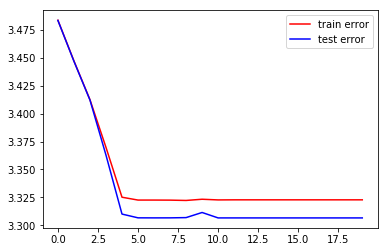

In [26]:
plt.plot(trainLoss, 'r', label = "train error")
plt.plot(testLoss, 'b', label = "test error")
plt.legend()
#plt.show()

In [112]:
pred = sess.run(y, feed_dict={x: test_attr, y_: test_labels})

In [113]:
print(pred)

[[0.04181039 0.01869627 0.03074602 ... 0.01525643 0.06721103 0.03821089]
 [0.04179556 0.01873273 0.03076604 ... 0.01529889 0.06707184 0.03820963]
 [0.04196387 0.01842511 0.03063373 ... 0.01496045 0.06823729 0.03826947]
 ...
 [0.04197668 0.01842695 0.03064619 ... 0.01496786 0.06822609 0.03828476]
 [0.04200403 0.01837563 0.03062347 ... 0.01491165 0.06842163 0.03829397]
 [0.04200133 0.0183528  0.03060083 ... 0.01488092 0.06851322 0.03828125]]


In [43]:
errors = 0.

for i in range(pred.shape[0]):
    if(np.argmax(pred[i]) != np.argmax(test_labels[i])):
        errors = errors + 1
        
print('Test error: ' + str(errors/pred.shape[0]))

KeyError: 0

In [52]:
print(sum(pred[0]))

0.9999999888241291


In [54]:
print(pred[0])

[0.02817809 0.0334987  0.03441791 0.03418315 0.02891144 0.02826883
 0.03432624 0.0283306  0.03391526 0.03039103 0.03016374 0.02906964
 0.02854151 0.02845554 0.03086325 0.03044385 0.03232998 0.03424703
 0.02824459 0.0282157  0.02831818 0.02782955 0.02814574 0.02800044
 0.03359627 0.02771376 0.02845698 0.03047338 0.03326365 0.02911671
 0.02870888 0.03287623 0.02850411]


In [42]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [35]:
sess.run(accuracy)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,8]
	 [[node Placeholder (defined at <ipython-input-18-1064de95a02f>:4)  = Placeholder[dtype=DT_FLOAT, shape=[?,8], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node Mean_3/_17}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_43_Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\hecto\Anaconda23\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hecto\Anaconda23\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\hecto\Anaconda23\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\hecto\Anaconda23\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-1064de95a02f>", line 4, in <module>
    x = tf.placeholder(tf.float32, [None, 8])
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5206, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\hecto\Anaconda23\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,8]
	 [[node Placeholder (defined at <ipython-input-18-1064de95a02f>:4)  = Placeholder[dtype=DT_FLOAT, shape=[?,8], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node Mean_3/_17}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_43_Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
W0 = tf.Variable(tf.random_normal([8, neurons_hidden1], stddev = 0.01))
B0 = tf.Variable(tf.random_normal([neurons_hidden1], stddev = 0.01))

W1 = tf.Variable(tf.random_normal([neurons_hidden1, neurons_hidden2], stddev = 0.01))
B1 = tf.Variable(tf.random_normal([neurons_hidden2], stddev = 0.01))

W2 = tf.Variable(tf.random_normal([neurons_hidden2, 33], stddev = 0.01))
B2 = tf.Variable(tf.random_normal([33], stddev = 0.01))

h = tf.nn.relu(tf.matmul(x, W0) + B0)
g = tf.nn.relu(tf.matmul(h, W1) + B1)
y = tf.nn.softmax(tf.matmul(g, W2) + B2)



hidden_1_layer = {'weights':tf.Variable(tf.random_normal([8, neurons_hidden1])),
                      'biases':tf.Variable(tf.random_normal([neurons_hidden1]))}

hidden_2_layer = {'weights':tf.Variable(tf.random_normal([neurons_hidden1, neurons_hidden2])),
                  'biases':tf.Variable(tf.random_normal([neurons_hidden2]))}

hidden_3_layer = {'weights':tf.Variable(tf.random_normal([neurons_hidden2, neurons_hidden3])),
                  'biases':tf.Variable(tf.random_normal([neurons_hidden3]))}

output_layer = {'weights':tf.Variable(tf.random_normal([neurons_hidden3, 33])),
                'biases':tf.Variable(tf.random_normal([33])),}


l1 = tf.add(tf.matmul(x,hidden_1_layer['weights']), hidden_1_layer['biases'])
l1 = tf.nn.relu(l1)

l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
l2 = tf.nn.relu(l2)

l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
l3 = tf.nn.relu(l3)

output = tf.nn.softmax(tf.matmul(l3,output_layer['weights']) + output_layer['biases'])